In [1]:
from Data_Preprocess import Data_Preprocess
from sklearn.model_selection import train_test_split
import numpy as np
from Metrics import Metrics

In [2]:
url = 'mushroom.txt'
column_names_csv = 'mushroom_feature_names.csv'
preprocessing = Data_Preprocess(url, column_names_csv)
preprocessing.load_dataset()
nan_counts = preprocessing.drop_columns_with_high_nan(threshold=2000)
preprocessing.encode_categorical_features()
encoded_data_types = preprocessing.display_data_types()
dataset = preprocessing.dataset

# Q4.1.1

In [3]:
X = dataset.drop(columns=['class'])
y = dataset['class']

# Q.4.1.2

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q4.1.3

what is the difference between Naive Bayes classifier and LDA?

Naive Bayes (NB) classifier and Generalized Linear Discriminant Analysis (GLDA) are both machine learning algorithms used for classification tasks, but they have different underlying assumptions and approaches.

1. Assumptions:
        Naive Bayes: It is based on the Bayes' theorem and assumes that features are conditionally independent given the class label.
        GLDA: Generalized Linear Discriminant Analysis is an extension of Linear Discriminant Analysis (LDA) and assumes that the data come from a mixture of several multivariate normal distributions, each with its own set of parameters.

2. Handling Continuous vs. Categorical Features:
    Naive Bayes: Typically used for categorical features. It's well-suited for text classification tasks, where features might represent the presence or absence of words.
    GLDA: Can handle both continuous and categorical features. It is particularly suitable for problems where the data is continuous and follows a multivariate normal distribution.

3. Decision Boundary:
    Naive Bayes: Employs a probabilistic model based on Bayes' theorem and calculates the probability of each class given the input features. The decision boundary is linear.
    GDA: Defines decision boundaries that are quadratic or higher-order, allowing for more complex relationships between features.

4. Training Data Requirements:
    Naive Bayes: Requires a relatively small amount of training data to estimate the parameters needed for classification.
    GLDA: May require more data, especially if the underlying assumptions of multivariate normality hold strictly.

5. Use Cases:
    Naive Bayes: Often used in natural language processing tasks like spam filtering and document classification.
    GLDA: Suitable for more general classification tasks where the data distribution can be reasonably assumed to be multivariate normal.

# Q4.1.4

What are the model parameters of a Naive Bayes classifier? What is the role of each parameter?
Between Naive Bayes, QDA, and LDA, which one has potentially more parameters? why?

The parameters of a Naive Bayes classifier depend on the specific variant of Naive Bayes being used. The three common variants are Gaussian Naive Bayes (GNB), Multinomial Naive Bayes (MNB), and Bernoulli Naive Bayes (BNB). Here are the parameters for each:


3. **Bernoulli Naive Bayes (BNB):**
    - **Parameters:**
        - **Class Priors (π):** The probability of each class in the training dataset.
        - **Feature Probabilities (θ):** The probability of each feature being 1 (presence) given the class.

The role of each parameter in Naive Bayes is as follows:
- **Class Priors (π):** Represents the prior probability of each class and is estimated from the training data.
- **Class Means and Variances (μ, σ^2) for GNB:** Used in Gaussian Naive Bayes to model the distribution of features within each class.
- **Feature Probabilities (θ):** Represent the probabilities associated with each feature given the class. In MNB and BNB, these are used to compute the likelihood of the observed features given the class.

**Comparison of Parameters:**
- **Naive Bayes:** The number of parameters depends on the number of classes and the dimensionality of the feature space. For GNB, it also depends on the number of features.
- **QDA (Quadratic Discriminant Analysis):** The number of parameters increases with the number of classes, and for each class, it involves parameters for the mean and covariance matrix, resulting in potentially more parameters compared to Naive Bayes.
- **LDA (Linear Discriminant Analysis):** Similar to QDA, but it assumes a common covariance matrix across classes, reducing the number of parameters compared to QDA.

In terms of the potential number of parameters:
$$ \text{Naive Bayes} < \text{LDA} < \text{QDA} $$

Naive Bayes tends to have fewer parameters, making it less prone to overfitting, but it makes strong independence assumptions. QDA and LDA, on the other hand, can capture more complex relationships but may require more data and are more susceptible to overfitting.

# Q4.1.5

In [5]:
class BernoulliNaiveBayes:
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {}
        self.feature_likelihoods = {}
        for c in self.classes:
            self.class_priors[c] = np.sum(y == c) / len(y)
            self.feature_likelihoods[c] = np.mean(X[y == c], axis=0)

    def predict(self, X):
        X = X.values
        predictions = []
        for sample in X:
            class_scores = []
            for c in self.classes:
                epsilon = 1e-10
                prior = np.log(self.class_priors[c] + epsilon)
                likelihood = np.sum(sample * np.log(self.feature_likelihoods[c] + epsilon) + (1 - sample) * np.log(1 - self.feature_likelihoods[c] + epsilon))
                class_scores.append(prior + likelihood)
                
            predicted_class = self.classes[np.argmax(class_scores)]
            predictions.append(predicted_class)

        return np.array(predictions)


In [ ]:
model = BernoulliNaiveBayes()
model.fit(X_train, y_train)

In [11]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
metrics_test = Metrics(y_test)
metrics_train = Metrics(y_train)

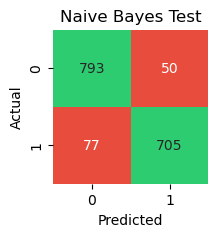

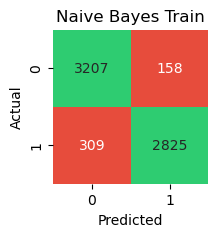

In [13]:
metrics_test.display_confusion_matrix(y_pred_test,"Naive Bayes Test")
metrics_train.display_confusion_matrix(y_pred_train,"Naive Bayes Train")

In [17]:
misclassified_test = metrics_test.misclassified_samples(y_pred_test)
print("misclassified test samples by: ", misclassified_test)
misclassified_train = metrics_train.misclassified_samples(y_pred_train)
print("misclassified Train samples by: ", misclassified_train)

misclassified test samples by:  127
misclassified Train samples by:  467


In [16]:
accuarcy_test = metrics_test.accuracy(y_pred_test)
print("Accuracy Test samples by: ", accuarcy_test)
accuarcy_train = metrics_train.accuracy(y_pred_train)
print("Accuracy Train samples by: ", accuarcy_train)

Accuracy Test samples by:  0.9218461538461539
Accuracy Train samples by:  0.928142791198646
